In [1]:
from main_train import *
from model.SimpleANN import *
import adversary

For this experiment was run two models to see advantage of maximizing lipschitz margin against adversary attacks (for this case was tested against gaussian noise)<br>
Both models have the same structure -- simply 3 fully connected layers with ReLu as activation.<br>
The first network was optimizing cross etropy loss function while the second model was optiziming cross entropy - margin_rate * margin loss.<br> The margin loss is defined next:<br>
$$\vec{y} = softmax(F(\vec{x}))$$
$$\mathcal{L}_{lipschitz\ margin} = \frac{1}{N} \sum_{\vec{y} \in \mathcal{C}}(max(\vec{y}) - max(\vec{y}_{/{max(\vec{y})})}) : \mathcal{C} = \{\vec{y_i} : argmax(\vec{y_i}) = argmax(\vec{\hat{y_i}})\}$$
In another words, munis sum of differences first 2 choices of network, taking to account only examples correctly predicted.

In [2]:
n_dim = 784
y_dim = 10
trained_marginless = 'trained_models/margin=0/model.ckpt'
trained_margin = 'trained_models/margin=1/model.ckpt'

Run training for both models with equal hyperparameters<br>
$\lambda = 10^{-4}$<br>
$batch\_size = 64$<br>
$steps = 10\ 000$<br>
For model including margin:<br>
$margin\_rate = 1.0$

In [3]:
margin_statistics, marginless_statistics = train_models()

/home/artyiom/.local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
t = 200, accuracy = 0.638672, loss = 0.745390
t = 400, accuracy = 0.707031, loss = 0.455628
t = 600, accuracy = 0.757812, loss = 0.143119
t = 800, accuracy = 0.812500, loss = -0.005051
t = 1000, accuracy = 0.835938, loss = -0.154094
t = 1200, accuracy = 0.873047, loss = -0.240318
t = 1400, accuracy =

Load models trained models

In [4]:
with tf.Graph().as_default():
    model_marginless = SimpleANN(n_dim=n_dim, y_dim=y_dim, margin_rate=0.0, source=trained_marginless)
with tf.Graph().as_default():
    model_margin = SimpleANN(n_dim=n_dim, y_dim=y_dim, margin_rate=1.0, source=trained_margin)

/home/artyiom/.local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Restoring parameters from trained_models/margin=0/model.ckpt
INFO:tensorflow:Restoring parameters from trained_models/margin=1/model.ckpt


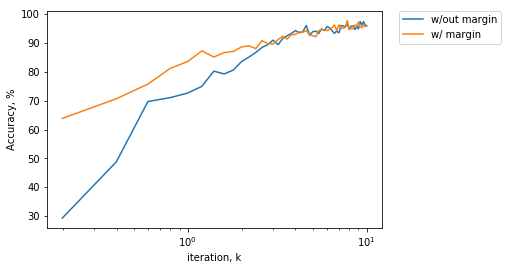

In [5]:
plt.ylabel("Accuracy, %")
plt.xlabel("iteration, k")
plt.xscale('log')
plt.plot(np.array(marginless_statistics[2]) / 1000, np.array(marginless_statistics[0]) * 100, label="w/out margin")
plt.plot(np.array(margin_statistics[2]) / 1000, np.array(margin_statistics[0]) * 100, label="w/ margin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

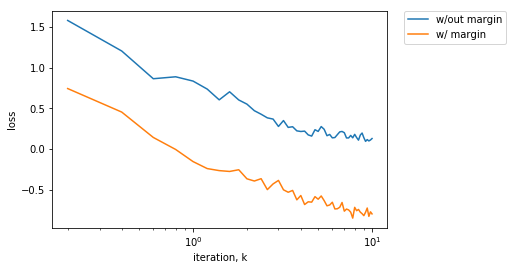

In [6]:
plt.ylabel("loss")
plt.xlabel("iteration, k")
plt.xscale('log')
plt.plot(np.array(marginless_statistics[2]) / 1000, np.array(marginless_statistics[1]), label="w/out margin")
plt.plot(np.array(margin_statistics[2]) / 1000, np.array(margin_statistics[1]), label="w/ margin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [7]:
dataset = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Example of trained models with small test set

In [8]:
adversary.test(model_marginless, dataset=dataset, batch_size=1024, noise=0.0)

{'accuracy': 0.96484375, 'loss': 0.13771212}

In [9]:
adversary.test(model_margin, dataset=dataset, batch_size=1024, noise=0.0)

{'accuracy': 0.966796875, 'loss': -0.7701862}

Run pairwise test with different noise level (from 0 to 1, complete random image).
Plot below shows accuracy of the model on images with given noise.

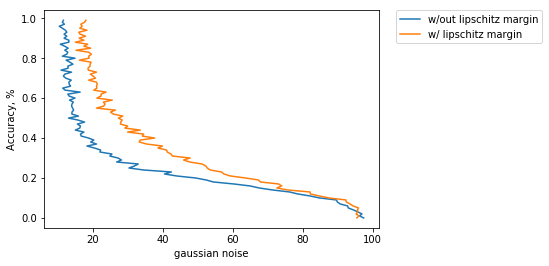

In [10]:
results = adversary.pair_test(model_margin, model_marginless, dataset, 2**10)

Depends on hyperparameters, the model with margin shows from no improvement against gaussian noise to up 40% improvements. Was noticed examples where with noise of 40% simple model performed with 40% accuracy while model trained with margin still performed with accuracy >95%.<br>
Result is very unstable vary from up to 40% improvement to not at all.

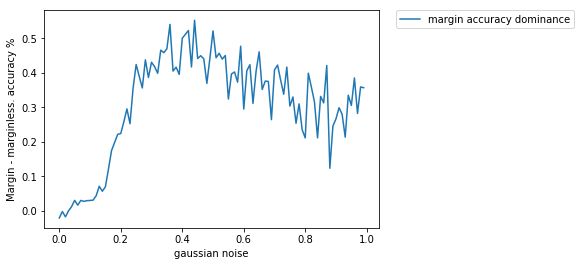

In [11]:
# plot difference graph
diff = (np.array(results[0]) - np.array(results[1])) / np.array(results[0])
plt.xlabel("gaussian noise")
plt.ylabel("Margin - marginless. accuracy %")
plt.plot(np.arange(0.0, 1.0, 0.01), diff, label="margin accuracy dominance")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)